# Parcels

https://www.dallasopendata.com/Geography-Boundaries/Parcel-Shapefile/hy5f-5hrv

These are the legal units of land, which should also uniquely correspond to addresses??



In [1]:
import os, zipfile
#datadir = os.path.join("/media", "disk-1", "Dallas_Parcels")
datadir = os.path.join("..", "..", "..", "..", "Data")
#os.listdir(datadir)

In [2]:
import geopandas as gpd

In [3]:
frame = gpd.io.file.read_file(os.path.join(datadir, "Dallas_Parcels"))
frame.head()

,acct,appraisaly,area_feet,bldg_cl,busname,city,county,dacouncil,geometry,gis_acct,...,taxpaadd_2,taxpaadd_3,taxpaadd_4,taxpacity,taxpacnty,taxpaname_,taxpasta,taxpazip,totexempt,unitid
0,44012900010040000,2016.0,145403.721,APARTMENT (BRICK EXTERIOR),None,ROWLETT,DALLAS COUNTY,0.0,POLYGON ((-96.55067864183825 32.90898754719765...,44012900010040000,...,920 TENISON MEMORIAL,None,None,DALLAS,UNITED STATES OF AMERICA,AC LAKESHORE VILLA LLC,TEXAS,752231142,None,None
1,44012900010040000,2016.0,86696.326,APARTMENT (BRICK EXTERIOR),None,ROWLETT,DALLAS COUNTY,0.0,POLYGON ((-96.55063286812529 32.90885054667822...,44012900010040000,...,920 TENISON MEMORIAL,None,None,DALLAS,UNITED STATES OF AMERICA,AC LAKESHORE VILLA LLC,TEXAS,752231142,None,None
2,00ROCKISLANDRR100,2016.0,513240.657,OFFICE BUILDING,None,DALLAS,NO COUNTY,2.0,POLYGON ((-96.90327882345102 32.81448261765021...,00ROCKISLANDRR100,...,PO BOX 660163,None,None,DALLAS,UNITED STATES OF AMERICA,DART & FT WORTH TRANSP AUTH,TEXAS,752660163,X,None
3,00ROCKISLANDRR100,2016.0,255106.021,OFFICE BUILDING,None,DALLAS,NO COUNTY,2.0,POLYGON ((-96.83188336606317 32.80628653186295...,00ROCKISLANDRR100,...,PO BOX 660163,None,None,DALLAS,UNITED STATES OF AMERICA,DART & FT WORTH TRANSP AUTH,TEXAS,752660163,X,None
4,00ROCKISLANDRR100,2016.0,357390.767,OFFICE BUILDING,None,DALLAS,NO COUNTY,2.0,POLYGON ((-96.82087794950186 32.80383479373801...,00ROCKISLANDRR100,...,PO BOX 660163,None,None,DALLAS,UNITED STATES OF AMERICA,DART & FT WORTH TRANSP AUTH,TEXAS,752660163,X,None


In [4]:
row = frame.ix[0]
row

acct                                          44012900010040000
appraisaly                                                 2016
area_feet                                                145404
bldg_cl                              APARTMENT (BRICK EXTERIOR)
busname                                                    None
city                                                    ROWLETT
county                                            DALLAS COUNTY
dacouncil                                                     0
geometry      POLYGON ((-96.55067864183825 32.90898754719765...
gis_acct                                      44012900010040000
legal_1                                       LAKESHORE VILLAGE
legal_2                               BLK A LOT 4 & BLK B LOT 4
legal_3                                                    None
legal_4                        INT201100335875 DD12222011 CO-DC
legal_5                       0129000100400         2CW01290001
mapsco_gr                               

In [5]:
f = frame[ ["city", "county", "geometry", "bldg_cl", "prop_cl"]
    + [x for x in frame.columns if x[:3] == "st_"] ]
f.crs

{'init': 'epsg:4326'}

In [6]:
f.head()

,city,county,geometry,bldg_cl,prop_cl,st_dir,st_name,st_num,st_type
0,ROWLETT,DALLAS COUNTY,POLYGON ((-96.55067864183825 32.90898754719765...,APARTMENT (BRICK EXTERIOR),MFR - APARTMENTS,None,LAKEVIEW PKWY,5301,None
1,ROWLETT,DALLAS COUNTY,POLYGON ((-96.55063286812529 32.90885054667822...,APARTMENT (BRICK EXTERIOR),MFR - APARTMENTS,None,LAKEVIEW PKWY,5301,None
2,DALLAS,NO COUNTY,POLYGON ((-96.90327882345102 32.81448261765021...,OFFICE BUILDING,RAILROAD CORRIDOR,None,OAK LAWN AVE,1900,None
3,DALLAS,NO COUNTY,POLYGON ((-96.83188336606317 32.80628653186295...,OFFICE BUILDING,RAILROAD CORRIDOR,None,OAK LAWN AVE,1900,None
4,DALLAS,NO COUNTY,POLYGON ((-96.82087794950186 32.80383479373801...,OFFICE BUILDING,RAILROAD CORRIDOR,None,OAK LAWN AVE,1900,None


In [7]:
f.to_file(os.path.join(datadir, "Dallas_Parcels_Selected"))

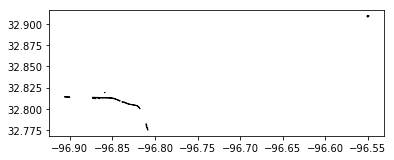

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
f.ix[:10].plot()

## Load the crime data, and try to match

In [12]:
import pandas as pd

filename = os.path.join(datadir, "Dallas_11_Sept_2017.csv")
frame = pd.read_csv(filename, low_memory=False)
frame.head()

,Incident Number w/ Year,Year of Incident,Incident Number wo/ Year,Offense Service Number,Service Number ID,Watch,Call (911) Problem,Type of Incident,Penalty Class,Type of Location,...,UCR Offense Description,Offense Type,Modus Operandi (MO),Family Offense,Hate Crime,Gang Related Offense,Victim Package,Drug Related Incident,Update Date,Location1
0,276285-2016,2016,276285,276285D,276285-2016-01,U,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,F2,Apartment Residence,...,BURGLARY,PART1,UNKNOWN SUSPECT GAINED FORCED ENTRY TO APT AND...,No,NaN,No,NaN,No,11/26/2016 08:29:01 PM,"5850 BELT LINE RD\nDALLAS, TX 75254\n(32.95394..."
1,277474-2016,2016,277474,277474D,277474-2016-01,1,7X - MAJOR ACCIDENT,ACCIDENT INV DAMAGE TO VEHICLE,MB,Motor Vehicle,...,MOTOR VEHICLE ACCIDENT,PART2,SUSPECT HIT COMP'S VEHICLE AND FLED SCENE.,No,NaN,No,NaN,No,12/02/2016 09:00:04 PM,"4400 W DAVIS ST\nDALLAS, TX 75211\n(32.749608,..."
2,276593-2016,2016,276593,276593D,276593-2016-01,3,55 - TRAFFIC STOP,FOUND PROPERTY (NO OFFENSE),NaN,"Highway, Street, Alley ETC",...,FOUND PROPERTY,NOT CODED,FOUND PROPERTY,No,NaN,No,NaN,No,11/21/2016 06:43:35 AM,"600 E COLORADO BLVD\nDALLAS, TX 75203\n(32.758..."
3,276430-2016,2016,276430,276430D,276430-2016-01,3,20 - ROBBERY,ROBBERY OF BUSINESS (AGG),F1,Restaurant/Food Service/TABC Location,...,ROBBERY,PART1,SUSP ENTERED LOC SHOWED WIT#1 HANDGUN TOOK COM...,No,NaN,No,NaN,UNK,12/19/2016 06:41:29 AM,"2231 SINGLETON BLVD\nDALLAS, TX 75212\n(32.778..."
4,277049-2016,2016,277049,277049D,277049-2016-01,1,PSE/09 - THEFT,"THEFT OF PROP > OR EQUAL $2,500 BUT <$30K- NOT...",FS,Other,...,THEFT,PART1,UNKNOWN SUSPECT REMOVED COMPLAINANT WATCH FROM...,No,NaN,No,NaN,No,11/23/2016 11:51:58 AM,"400 CRESCENT CT\nDALLAS, TX 75201\n(32.794004,..."


In [18]:
for i, row in frame.iterrows():
    print( row["Incident Address"], ",", row["City"] )
    break

5850 BELT LINE RD , DALLAS


In [22]:
street = f[(f.st_name == "BELT LINE RD") & (f.city == "DALLAS")]
row = street[street.st_num == "5850"]
row

,city,county,geometry,bldg_cl,prop_cl,st_dir,st_name,st_num,st_type
297681,DALLAS,DALLAS COUNTY,POLYGON ((-96.80822643211883 32.95386176187954...,APARTMENT (BRICK EXTERIOR),MFR - APARTMENTS,None,BELT LINE RD,5850,None


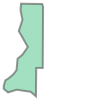

In [27]:
geo = list(row.geometry)[0]
geo

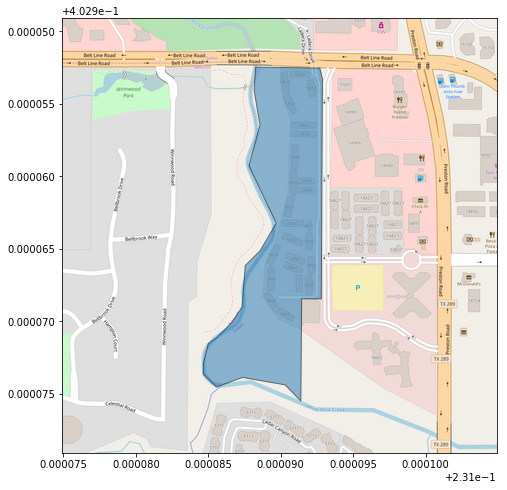

In [42]:
import tilemapbase
import descartes
import shapely.ops

ex = tilemapbase.Extent.from_centre_lonlat(*list(geo.centroid.coords)[0], xsize=0.00003)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)

fig, ax = plt.subplots(figsize=(8,8))
plotter.plot(ax)
g = shapely.ops.transform(lambda x,y,z=None : tilemapbase.project(x,y), geo)
ax.add_patch( descartes.PolygonPatch(g, alpha=0.5) )

In [43]:
fig.savefig("temp.pdf", dpi=300)

So this all works.  But we see a "local geography" problem here: the whole selection of apartment blocks has the same street address!

In [50]:
this_add = frame[frame["Incident Address"] == "5850 BELT LINE RD"]
xcs = this_add[" X Coordinate "].as_matrix()
ycs = this_add[" Y Coordinate"].as_matrix()

In [69]:
import pyproj

proj = pyproj.Proj({"init" : "epsg:2845"})

xx, yy = [], []
for x, y in zip(*proj(xcs * 1200 / 3937, ycs * 1200 / 3937, inverse=True)):
    x, y = tilemapbase.project(x, y)
    xx.append(x)
    yy.append(y)

In [70]:
def to_lon_lat(x):
    x = x.splitlines()[2]
    assert x[0] == "(" and x[-1] == ")"
    x = x[1:-1]
    x = x.split(", ")
    return float(x[1]), float(x[0])

loc = this_add["Location1"]
xl, yl = [], []
for x, y in loc[~loc.isnull()].map(to_lon_lat):
    x, y = tilemapbase.project(x, y)
    xl.append(x)
    yl.append(y)

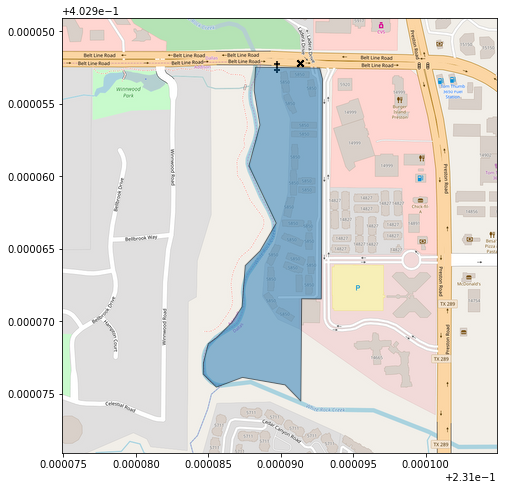

In [72]:
ex = tilemapbase.Extent.from_centre_lonlat(*list(geo.centroid.coords)[0], xsize=0.00003)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)

fig, ax = plt.subplots(figsize=(8,8))
plotter.plot(ax)
g = shapely.ops.transform(lambda x,y,z=None : tilemapbase.project(x,y), geo)
ax.add_patch( descartes.PolygonPatch(g, alpha=0.5) )

ax.scatter(xx, yy, marker="+", color="black")
ax.scatter(xl, yl, marker="x", color="black")
None

So, a large number of distinct events all get coded to the same place: and both the x/y coords, and the "location" data, while are "close" to the area, and not representative of where the crime _actually_ happened.

### Conclusion

Whatever we do, it's no worse than the existing data.

In [136]:
skip = 1

for i, row in frame[frame["UCR Offense Description"] == "BURGLARY"].iterrows():
    i = row["Incident Address"].find(" ")
    st_num = row["Incident Address"][:i]
    st_name = row["Incident Address"][i+1:]
    city = row["City"]
    street = f[(f.st_name == st_name) & (f.city == city)]
    assert len(street) > 0
    part = street[street.st_num == st_num]
    if len(part) == 0:
        skip -= 1
        assert(skip>=0)

AssertionError: 

In [137]:
st_num, st_name, city

('8032', 'FERGUSON RD', 'DALLAS')

In [138]:
street

,city,county,geometry,bldg_cl,prop_cl,st_dir,st_name,st_num,st_type
42769,DALLAS,DALLAS COUNTY,POLYGON ((-96.66592208365168 32.84194361854765...,STORAGE WAREHOUSE,COMMERCIAL IMPROVEMENTS,None,FERGUSON RD,10625,None
42839,DALLAS,DALLAS COUNTY,POLYGON ((-96.66881000630524 32.83949350201487...,13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10505,None
42844,DALLAS,DALLAS COUNTY,"POLYGON ((-96.6669588828033 32.84069869782422,...",13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10573,None
42845,DALLAS,DALLAS COUNTY,"POLYGON ((-96.66723057972152 32.8404753581289,...",13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10563,None
42846,DALLAS,DALLAS COUNTY,POLYGON ((-96.66849621413748 32.83943590788487...,13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10515,None
42917,DALLAS,DALLAS COUNTY,"POLYGON ((-96.67298326813618 32.8353128855419,...",FREE STANDING RETAIL STORE,COMMERCIAL IMPROVEMENTS,None,FERGUSON RD,10305,None
42929,DALLAS,DALLAS COUNTY,POLYGON ((-96.66978867964482 32.83881978653494...,04,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10481,None
42930,DALLAS,DALLAS COUNTY,POLYGON ((-96.66994712028388 32.83868196624518...,13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10477,None
42931,DALLAS,DALLAS COUNTY,POLYGON ((-96.67021336369253 32.83845036294721...,04,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10465,None
42932,DALLAS,DALLAS COUNTY,POLYGON ((-96.67033950535287 32.83834060295879...,13,SINGLE FAMILY RESIDENCES,None,FERGUSON RD,10459,None


In [139]:
row

Incident Number w/ Year                                             276593-2015
Year of Incident                                                           2015
Incident Number wo/ Year                                                 276593
Offense Service Number                                                  276593C
Service Number ID                                                276593-2015-01
Watch                                                                         1
Call (911) Problem                               41/11B - BURG BUSN IN PROGRESS
Type of Incident                            BURGLARY OF BUILDING - FORCED ENTRY
Penalty Class                                                                FS
Type of Location                                                   Retail Store
Type of Property                            Commercial Property Occupied/Vacant
Street Block                                                               8032
Street Direction                        

(-96.713479, 32.802074)

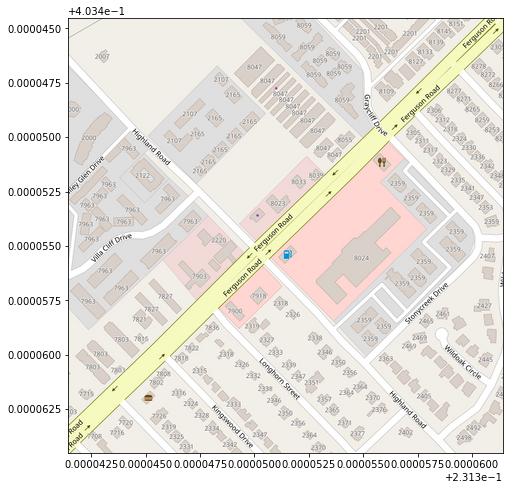

In [140]:
ex = tilemapbase.Extent.from_centre_lonlat(*to_lon_lat(row.Location1), xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=400)

fig, ax = plt.subplots(figsize=(8,8))
plotter.plot(ax)
to_lon_lat(row.Location1)

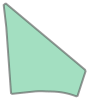

In [96]:
list(street.geometry)[0]

### Findings

A lot of missing addresses, but it's hard to see how the parcel database is "wrong" or incomplete.

- 400 CRESCENT CT  Apt 332.  But on the ground this is all one massive appartment complex, and should all have the address 100.
  - From google street view, I did find 300.  But this is not a scalable solution!
  - Maybe could use the TIGER/Lines "edges" dataset and interpolate?
  - The open address data doesn't help...
- 3335 MUNGER AVE  Again, no real idea where this _actually_ is.
  - 3305 is a massive "gated" community.  No street view.  No TIGER/Lines coverage...
- 347 W JEFFERSON BLVD
  - Can find on Street View, but not otherwise.
  
## Conclude

Not really sure this is going to fly...

- Looks like the open address data is derived from the parcel data-- just centroids of each parcel.
- OSM fails with with e.g. 347 W JEFFERSON BLVD, and Google only finds the closest parcel, 351